In [1]:
#List of libraries used
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

#Read dataset into pandas dataframe
df = pd.read_csv("C:\\Users\\semen\\Desktop\\CmpE188Project\\FoodData_Preprocessed.csv")
df = df.fillna(0) #Fill in missing values with 0
df = df.drop(columns=['Unnamed: 0'])

In [2]:
#Split data into source and target variables
y_df = df['Based']
x_df = df.drop(columns=['Based'])

In [3]:
#Create a standardized dataset for Random Forest Classifier and K-Nearest Neighbors
x_df_std_temp = StandardScaler().fit_transform(x_df)
x_df_std = pd.DataFrame(x_df_std_temp, columns=x_df.columns)

In [4]:
#Code Adopted by https://stackoverflow.com/questions/12525722/normalize-data-in-pandas
#Create a normalized dataset for Guassian Naive Bayes
x_df_norm_temp = MinMaxScaler().fit_transform(x_df)
x_df_norm = pd.DataFrame(x_df_norm_temp, columns=x_df.columns)

In [5]:
#PCA setup
pca_95 = PCA(0.95)
pca_95.fit(x_df_std)
print("Number of components for 95% of variance: ", pca_95.n_components_)
pca_99 = PCA(0.99)
pca_99.fit(x_df_std)
print("Number of components for 99% of variance: ", pca_99.n_components_)
#Compare accuracy of PCA preprocessing at 95% and 99% variance

#Create PCA datasets for Random Forests and K-Nearest Neighbors
pca1 = pca_95.fit_transform(x_df_std)
pca2 = pca_99.fit_transform(x_df_std)

Number of components for 95% of variance:  30
Number of components for 99% of variance:  38


In [6]:
#Create training, testing, and validation sets

#Split pca_95 into train, test, and validation sets
X1_train_val, X1_test, y1_train_val, y1_test = train_test_split(pca1, y_df, random_state=0)
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train_val, y1_train_val, random_state=0)

#Split pca_99 into train, test, and validation sets
X2_train_val, X2_test, y2_train_val, y2_test = train_test_split(pca2, y_df, random_state=0)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train_val, y2_train_val, random_state=0)

#Split standardized, with no pca into train, test, and validation sets
X3_train_val, X3_test, y3_train_val, y3_test = train_test_split(x_df_std, y_df, random_state=0)
X3_train, X3_val, y3_train, y3_val = train_test_split(X3_train_val, y3_train_val, random_state=0)

#Split original set into train, test, and validation sets
X4_train_val, X4_test, y4_train_val, y4_test = train_test_split(x_df, y_df, random_state=0)
X4_train, X4_val, y4_train, y4_val = train_test_split(X4_train_val, y4_train_val, random_state=0)

#Split normalized, with no pca into train, test, and validation sets
X5_train_val, X5_test, y5_train_val, y5_test = train_test_split(x_df_norm, y_df, random_state=0)
X5_train, X5_val, y5_train, y5_val = train_test_split(X5_train_val, y5_train_val, random_state=0)

In [7]:
#Random Forest Classifier Models
forest1 = RandomForestClassifier(n_estimators=10, random_state=0, max_depth = 9)
forest1.fit(X1_train, y1_train)
forest2 = RandomForestClassifier(n_estimators=10, random_state=0, max_depth = 9)
forest2.fit(X2_train, y2_train)
forest3 = RandomForestClassifier(n_estimators=10, random_state=0, max_depth = 9)
forest3.fit(X3_train, y3_train)
forest4 = RandomForestClassifier(n_estimators=10, random_state=0, max_depth = 9)
forest4.fit(X4_train, y4_train)

#pca_95
print("PCA 95% variance")
print("Accuracy on pca_95 training set: {:.3f}".format(forest1.score(X1_train, y1_train)))
print("Accuracy on pca_95 test set: {:.3f}".format(forest1.score(X1_test, y1_test)))
print("Accuracy on pca_95 validation set: {:.3f}".format(forest1.score(X1_val, y1_val)))
#pca_99
print("PCA 99% variance")
print("Accuracy on pca_99 training set: {:.3f}".format(forest2.score(X2_train, y2_train)))
print("Accuracy on pca_99 test set: {:.3f}".format(forest2.score(X2_test, y2_test)))
print("Accuracy on pca_99 validation set: {:.3f}".format(forest2.score(X2_val, y2_val)))
#standardized, no pca
print("Standardized, no PCA")
print("Accuracy on standardized, no pca training set: {:.3f}".format(forest3.score(X3_train, y3_train)))
print("Accuracy on standardized, no pca test set: {:.3f}".format(forest3.score(X3_test, y3_test)))
print("Accuracy on standardized, no pca validation set: {:.3f}".format(forest3.score(X3_val, y3_val)))
#not standardized, no pca
print("Not standardized, no PCA")
print("Accuracy on not standardized, no pca training set: {:.3f}".format(forest4.score(X4_train, y4_train)))
print("Accuracy on not standardized, no pca test set: {:.3f}".format(forest4.score(X4_test, y4_test)))
print("Accuracy on not standardized, no pca validation set: {:.3f}".format(forest4.score(X4_val, y4_val)))

PCA 95% variance
Accuracy on pca_95 training set: 1.000
Accuracy on pca_95 test set: 0.989
Accuracy on pca_95 validation set: 0.980
PCA 99% variance
Accuracy on pca_99 training set: 0.998
Accuracy on pca_99 test set: 0.984
Accuracy on pca_99 validation set: 0.977
Standardized, no PCA
Accuracy on standardized, no pca training set: 1.000
Accuracy on standardized, no pca test set: 0.998
Accuracy on standardized, no pca validation set: 0.999
Not standardized, no PCA
Accuracy on not standardized, no pca training set: 1.000
Accuracy on not standardized, no pca test set: 0.998
Accuracy on not standardized, no pca validation set: 0.999


Text(0.5, 0, 'Feature importance')

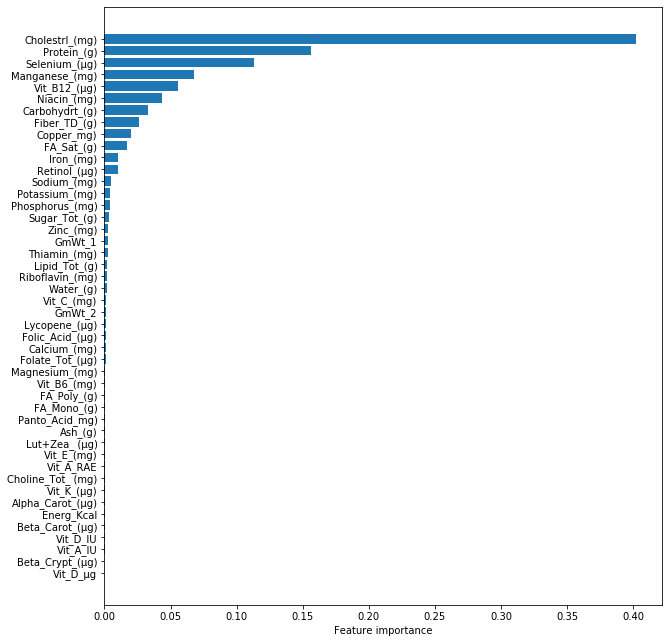

In [8]:
#Random Forest Feature Importances for Standardized Tree
#Code from https://www.datacamp.com/community/tutorials/random-forests-classifier-python
feature_imp = pd.Series(forest3.feature_importances_,index=x_df_std.columns).sort_values()

#Based on code example of "An Introduction to Machine Learning with Python" 
#by A.C. Muller and S. Guido (O'Reilly) and adapted by M. Eirinaki.
n_features = x_df_std.shape[1]
plt.figure(figsize=(10, 11))
plt.barh(range(n_features), feature_imp, align='center')
plt.yticks(np.arange(n_features), feature_imp.index)
plt.xlabel("Feature importance")

In [9]:
#Guassian Naive Bayes Models

#Normalized
model1 = GaussianNB()
model1.fit(X5_train, y5_train)

#Not normalized
model2 = GaussianNB()
model2.fit(X4_train, y4_train)


#Normalized set
print("Accuracy on Normalized, training set: {:.3f}".format(model1.score(X5_train, y5_train)))
print("Accuracy on Normalized, test set: {:.3f}".format(model1.score(X5_test, y5_test)))
print("Accuracy on Normalized, validation set: {:.3f}".format(model1.score(X5_val, y5_val)))
#Not Normalized set
print("Accuracy on not Normalized, training set: {:.3f}".format(model2.score(X4_train, y4_train)))
print("Accuracy on not Normalized, test set: {:.3f}".format(model2.score(X4_test, y4_test)))
print("Accuracy on not Normalized, validation set: {:.3f}".format(model2.score(X4_val, y4_val)))

Accuracy on Normalized, training set: 0.903
Accuracy on Normalized, test set: 0.914
Accuracy on Normalized, validation set: 0.895
Accuracy on not Normalized, training set: 0.896
Accuracy on not Normalized, test set: 0.907
Accuracy on not Normalized, validation set: 0.886


In [10]:
#K-Nearest Neighbors Models

#KNN PCA 95
KNN1 = KNeighborsClassifier(n_neighbors=3)
KNN1.fit(X1_train, y1_train)
#KNN PCA 99
KNN2 = KNeighborsClassifier(n_neighbors=3)
KNN2.fit(X2_train, y2_train)
#KNN Standardized
KNN3 = KNeighborsClassifier(n_neighbors=3)
KNN3.fit(X3_train, y3_train)
#KNN Not Standardized
KNN4 = KNeighborsClassifier(n_neighbors=3)
KNN4.fit(X4_train, y4_train)


#pca_95
print("PCA 95% variance")
print("Accuracy on pca_95 training set: {:.3f}".format(KNN1.score(X1_train, y1_train)))
print("Accuracy on pca_95 test set: {:.3f}".format(KNN1.score(X1_test, y1_test)))
print("Accuracy on pca_95 validation set: {:.3f}".format(KNN1.score(X1_val, y1_val)))
#pca_99
print("PCA 99% variance")
print("Accuracy on pca_99 training set: {:.3f}".format(KNN2.score(X2_train, y2_train)))
print("Accuracy on pca_99 test set: {:.3f}".format(KNN2.score(X2_test, y2_test)))
print("Accuracy on pca_99 validation set: {:.3f}".format(KNN2.score(X2_val, y2_val)))
#standardized, no pca
print("Standardized, no PCA")
print("Accuracy on standardized, no pca training set: {:.3f}".format(KNN3.score(X3_train, y3_train)))
print("Accuracy on standardized, no pca test set: {:.3f}".format(KNN3.score(X3_test, y3_test)))
print("Accuracy on standardized, no pca validation set: {:.3f}".format(KNN3.score(X3_val, y3_val)))
#not standardized, no pca
print("Not standardized, no PCA")
print("Accuracy on not standardized, no pca training set: {:.3f}".format(KNN4.score(X4_train, y4_train)))
print("Accuracy on not standardized, no pca test set: {:.3f}".format(KNN4.score(X4_test, y4_test)))
print("Accuracy on not standardized, no pca validation set: {:.3f}".format(KNN4.score(X4_val, y4_val)))

PCA 95% variance
Accuracy on pca_95 training set: 0.994
Accuracy on pca_95 test set: 0.985
Accuracy on pca_95 validation set: 0.987
PCA 99% variance
Accuracy on pca_99 training set: 0.993
Accuracy on pca_99 test set: 0.988
Accuracy on pca_99 validation set: 0.989
Standardized, no PCA
Accuracy on standardized, no pca training set: 0.993
Accuracy on standardized, no pca test set: 0.988
Accuracy on standardized, no pca validation set: 0.989
Not standardized, no PCA
Accuracy on not standardized, no pca training set: 0.983
Accuracy on not standardized, no pca test set: 0.967
Accuracy on not standardized, no pca validation set: 0.966


In [11]:
#Comparing accuracy and F1 scores of best models for each algorithm

#Random Forest
print("Random Forest")
print("Accuracy: {:.3f}".format(forest3.score(X3_val, y3_val)))
y_pred = forest3.predict(X3_val)
print("F1 Score: {:.3f}".format(f1_score(y3_val, y_pred)))
#Guassian Naive Bayes
print("Guassian Naive Bayes")
print("Accuracy: {:.3f}".format(model1.score(X5_val, y5_val)))
y_pred = model1.predict(X5_val)
print("F1 Score: {:.3f}".format(f1_score(y5_val, y_pred)))
#K-Nearest Neighbors
print("K-Nearest Neighbors")
print("Accuracy: {:.3f}".format(KNN3.score(X3_val, y3_val)))
y_pred = KNN3.predict(X3_val)
print("F1 Score: {:.3f}".format(f1_score(y3_val, y_pred)))

Random Forest
Accuracy: 0.999
F1 Score: 0.998
Guassian Naive Bayes
Accuracy: 0.895
F1 Score: 0.869
K-Nearest Neighbors
Accuracy: 0.989
F1 Score: 0.988


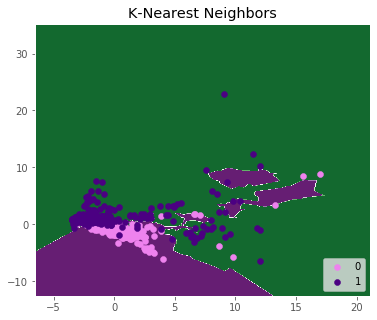

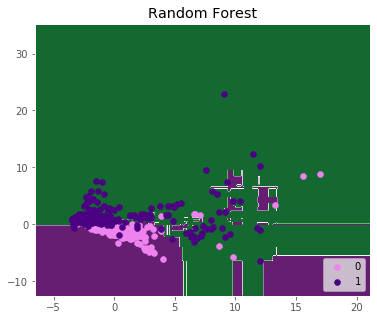

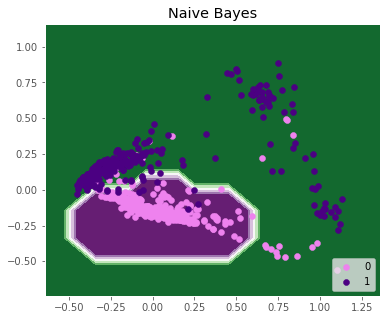

In [12]:
#Code adapted from http://benalexkeen.com/k-nearest-neighbours-classification-in-python/
%matplotlib inline
matplotlib.style.use('ggplot') 

pca_model = PCA(n_components=2)

for x in range(0,3):
    if x == 0:
        pca_model.fit(X3_train)
        X_train = pca_model.transform(X3_train)
        X_test = pca_model.transform(X3_val)

        KNN_vis = KNeighborsClassifier(n_neighbors=3)
        KNN_vis.fit(X_train, y3_train)
        y_val = y3_val
        
    if x == 1:
        RF_vis = RandomForestClassifier(n_estimators = 10, random_state = 0, max_depth = 9)
        RF_vis.fit(X_train, y3_train)
        
    if x == 2:
        pca_model.fit(X5_train)
        X_train = pca_model.transform(X5_train)
        X_test = pca_model.transform(X5_val)
        
        NB_vis = GaussianNB()
        NB_vis.fit(X_train, y5_train)
        y_val = y5_val

    fig = plt.figure(figsize=(6, 5))
    
    ax = fig.add_subplot(111)
    padding = 0.1
    resolution = 0.1

    colors = {0: 'violet', 1: 'indigo', 2: 'palegreen'}
    x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
    y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()
    x_range = x_max - x_min
    y_range = y_max - y_min
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding

    # Get decision boundaries from model
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    if x == 0:
        Z = KNN_vis.predict(np.c_[xx.ravel(), yy.ravel()])
    if x == 1:
        Z = RF_vis.predict(np.c_[xx.ravel(), yy.ravel()])
    if x == 2:
        Z = NB_vis.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour map
    plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn)
    plt.axis('tight')

    #group = ("Animals", "Plants")

    # Plot your testing points as wel
    for label in np.unique(y_val):
        indices = np.where(y_val == label)
        plt.scatter(X_test[indices, 0], X_test[indices, 1], c=colors[label], alpha=1, 
                    label='{}'.format(label))

    plt.legend(loc='lower right')
    if x == 0:
        plt.title('K-Nearest Neighbors')
    if x == 1:
        plt.title('Random Forest')
    if x == 2:
        plt.title('Naive Bayes')
plt.show()